imports

In [1]:
from w4un_hydromet_impact.hazard.main import calculate_hazard
from w4un_hydromet_impact.hazard.constants import KnownHazardSources
from w4un_hydromet_impact.exchange.events import CalculateImpactProperties
from w4un_hydromet_impact.impact.main import calculate_impact

/home/roo/miniforge3/envs/climada_flood/lib/python3.9/site-packages/dask/dataframe/_pyarrow_compat.py:17: FutureWarning: Minimal version of pyarrow will soon be increased to 14.0.1. You are using 12.0.1. Please consider upgrading.
  warnings.warn(


Creating a hazard based on ECMWF Tropical Cylcone Tracks
provide an empty string to fetch a current forecast or provide a filepath to a grib file as string

In [2]:
weather_data_location = '/home/roo/Documents/git_folder/Weather4UN_global_impact_estimates/jupyter/S1T01120000mars20210001'
centroids_location = '/home/roo/climada/data/centroids/earth_centroids_150asland_1800asoceans_distcoast_region_nopoles/v2/earth_centroids_150asland_1800asoceans_distcoast_region_nopoles.hdf5'
haz_Source = KnownHazardSources.TROPICAL_CYCLONE_FROM_ECMWF
haz_list = calculate_hazard(weather_data_location, centroids_location, haz_Source)

/home/roo/Documents/git_folder/climada_petals/climada_petals/hazard/tc_tracks_forecast.py:511: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  track = xr.Dataset(
/home/roo/Documents/git_folder/climada_petals/climada_petals/hazard/tc_tracks_forecast.py:511: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to th

2024-09-27 15:00:38,653 - climada_petals.hazard.tc_tracks_forecast - WARNING - Pressure at time 38: only 1 variable value for 2 ensemble members, duplicating value to all members. This is only acceptable for lat and lon data at time 0.
2024-09-27 15:00:38,654 - climada_petals.hazard.tc_tracks_forecast - WARNING - Pressure at time 39: only 1 variable value for 2 ensemble members, duplicating value to all members. This is only acceptable for lat and lon data at time 0.


/home/roo/Documents/git_folder/climada_petals/climada_petals/hazard/tc_tracks_forecast.py:511: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  track = xr.Dataset(
/home/roo/Documents/git_folder/climada_petals/climada_petals/hazard/tc_tracks_forecast.py:511: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to th

2024-09-27 15:00:39,357 - climada_petals.hazard.tc_tracks_forecast - WARNING - Latitude at time 13: only 1 variable value for 2 ensemble members, duplicating value to all members. This is only acceptable for lat and lon data at time 0.
2024-09-27 15:00:39,358 - climada_petals.hazard.tc_tracks_forecast - WARNING - Pressure at time 13: only 1 variable value for 2 ensemble members, duplicating value to all members. This is only acceptable for lat and lon data at time 0.
2024-09-27 15:00:39,359 - climada_petals.hazard.tc_tracks_forecast - WARNING - Pressure at time 14: only 1 variable value for 2 ensemble members, duplicating value to all members. This is only acceptable for lat and lon data at time 0.
2024-09-27 15:00:39,359 - climada_petals.hazard.tc_tracks_forecast - WARNING - Latitude at time 16: only 1 variable value for 2 ensemble members, duplicating value to all members. This is only acceptable for lat and lon data at time 0.
2024-09-27 15:00:39,360 - climada_petals.hazard.tc_track

/home/roo/Documents/git_folder/climada_petals/climada_petals/hazard/tc_tracks_forecast.py:511: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  track = xr.Dataset(
/home/roo/Documents/git_folder/climada_petals/climada_petals/hazard/tc_tracks_forecast.py:511: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to th

We can plot the hazard and print the hazard metadata

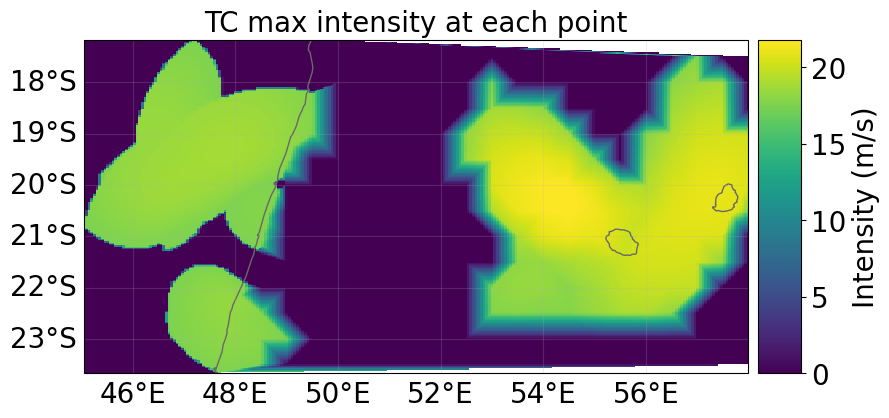

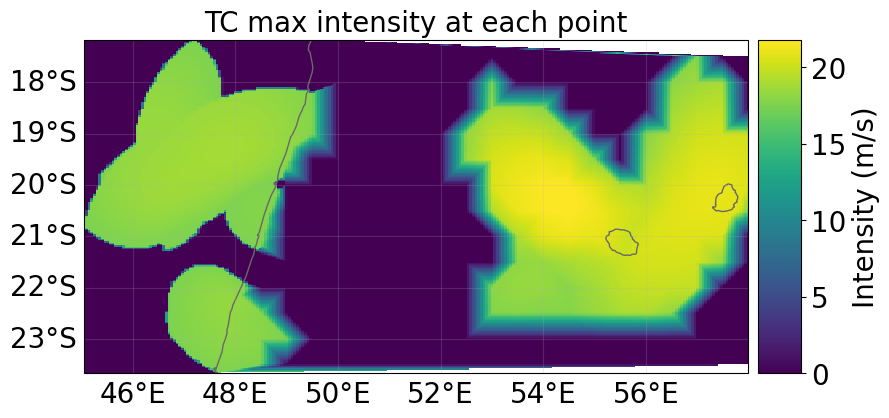

In [3]:
from climada.hazard import Hazard
from w4un_hydromet_impact.hazard.metadata import HazardMetadata
from w4un_hydromet_impact.hazard.plots import _create_hazard_plot
haz = Hazard.from_hdf5(haz_list[0][0])
with open(haz_list[0][1], 'rb') as file:
    hazard_metadata = HazardMetadata.read_from_json(file)
fig = _create_hazard_plot(haz,hazard_metadata)
fig

In [4]:
import json
with open(haz_list[0][1], 'r') as file:
    hazard_metadata_json = json.load(file)
hazard_metadata_pretty = json.dumps(hazard_metadata_json, indent=4)
print(hazard_metadata_pretty)

{
    "event_name": "DANILO",
    "initialisation_time": "2021-01-12T00:00:00.000000000",
    "leadtimes_per_country": {
        "450": {
            "country_name": "Madagascar",
            "country_alpha3": "MDG",
            "country_alpha2": "MG",
            "median_leadtime": "2021-01-14T13:00:00.000000000",
            "all_leadtimes": [
                "2021-01-14T13:00:00.000000000",
                "2021-01-15T11:30:00.000000000",
                "2021-01-14T07:30:00.000000000",
                "2021-01-13T10:30:00.000000000",
                "2021-01-17T05:00:00.000000000"
            ]
        },
        "250": {
            "country_name": "France",
            "country_alpha3": "FRA",
            "country_alpha2": "FR",
            "median_leadtime": "2021-01-12T04:00:00.000000000",
            "all_leadtimes": [
                "2021-01-12T04:00:00.000000000"
            ]
        },
        "480": {
            "country_name": "Mauritius",
            "country_alpha3":

We can now calculate the exposed population


/home/roo/miniforge3/envs/climada_flood/lib/python3.9/pickle.py:1717: UserWarning: Unpickling a shapely <2.0 geometry object. Please save the pickle again; shapely 2.1 will not have this compatibility.
  setstate(state)


2024-09-27 15:01:02,417 - climada_petals.engine.warn - WARNING - Values of input map are larger than defined levels. The larger values are set to a new and higher warn level.


/home/roo/miniforge3/envs/climada_flood/lib/python3.9/site-packages/geopandas/io/file.py:612: UserWarning: You are attempting to write an empty DataFrame to file. For some drivers, this operation may fail.
  _to_file_fiona(df, filename, driver, schema, crs, mode, **kwargs)
/home/roo/miniforge3/envs/climada_flood/lib/python3.9/pickle.py:1717: UserWarning: Unpickling a shapely <2.0 geometry object. Please save the pickle again; shapely 2.1 will not have this compatibility.
  setstate(state)


2024-09-27 15:01:08,272 - climada_petals.engine.warn - WARNING - Values of input map are larger than defined levels. The larger values are set to a new and higher warn level.


/home/roo/miniforge3/envs/climada_flood/lib/python3.9/pickle.py:1717: UserWarning: Unpickling a shapely <2.0 geometry object. Please save the pickle again; shapely 2.1 will not have this compatibility.
  setstate(state)


2024-09-27 15:01:20,264 - climada_petals.engine.warn - WARNING - Values of input map are larger than defined levels. The larger values are set to a new and higher warn level.


/home/roo/miniforge3/envs/climada_flood/lib/python3.9/pickle.py:1717: UserWarning: Unpickling a shapely <2.0 geometry object. Please save the pickle again; shapely 2.1 will not have this compatibility.
  setstate(state)
/home/roo/miniforge3/envs/climada_flood/lib/python3.9/site-packages/geopandas/io/file.py:612: UserWarning: You are attempting to write an empty DataFrame to file. For some drivers, this operation may fail.
  _to_file_fiona(df, filename, driver, schema, crs, mode, **kwargs)
/home/roo/miniforge3/envs/climada_flood/lib/python3.9/pickle.py:1717: UserWarning: Unpickling a shapely <2.0 geometry object. Please save the pickle again; shapely 2.1 will not have this compatibility.
  setstate(state)
/home/roo/miniforge3/envs/climada_flood/lib/python3.9/site-packages/geopandas/io/file.py:612: UserWarning: You are attempting to write an empty DataFrame to file. For some drivers, this operation may fail.
  _to_file_fiona(df, filename, driver, schema, crs, mode, **kwargs)
/home/roo/mi

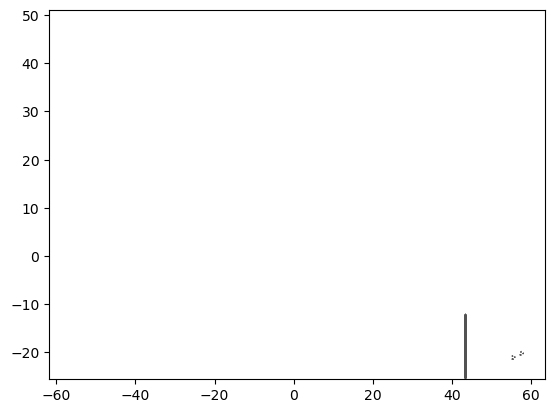

In [5]:
impact_types = ["exposed_population_18mps",
                "exposed_population_33mps",
                "exposed_population_43mps",
                "exposed_population_49mps",
                "exposed_population_58mps",
                "exposed_population_70mps"]
vulnerability_file_names = ["tc_exposed_18mps.xlsx",
                            "tc_exposed_33mps.xlsx",
                            "tc_exposed_43mps.xlsx",
                            "tc_exposed_49mps.xlsx",
                            "tc_exposed_58mps.xlsx",
                            "tc_exposed_70mps.xlsx"]
result = []
# loop for events in forecast
for event_i in haz_list:
    # loop for impact_types
    for impact_type, vulnerability_file_name in zip(impact_types, vulnerability_file_names):
        # loop for affected countries
        for leadtime_i in hazard_metadata_json['leadtimes_per_country'].values():
            calc_impact_properties = CalculateImpactProperties.create(
                country= leadtime_i['country_name'],
                vulnerability_file_name= vulnerability_file_name,
                impact_type= impact_type,
            )
            res = calculate_impact(
                file_location_hazard = event_i[0],
                file_location_metadata = event_i[1],
                hazard_source = haz_Source,
                calculate_impact_properties = calc_impact_properties)
            result.append(res)
            

We can now look at the results, mainly a summary and a polygon

In [13]:
one_result = result[0]


In [18]:
import json
with open(one_result[0][2], 'r') as file:
    summary_json = json.load(file)
summary_pretty = json.dumps(summary_json, indent=4)
print(summary_pretty)



{
    "countryName": "Mauritius",
    "hazardType": "TC",
    "impactType": "exposed_population_70mps",
    "initializationTime": "2021011200",
    "eventDate": "2021011200",
    "eventName": "DANILO",
    "leadTime": 0.0,
    "mean": 0.0,
    "min": 0.0,
    "max": 0.0,
    "median": 0.0,
    "05perc": 0.0,
    "25perc": 0.0,
    "75perc": 0.0,
    "95perc": 0.0,
    "productStatus": "alpha",
    "weatherModel": "ECMWF",
    "impactUnit": "people"
}


ValueError: aspect must be finite and positive 

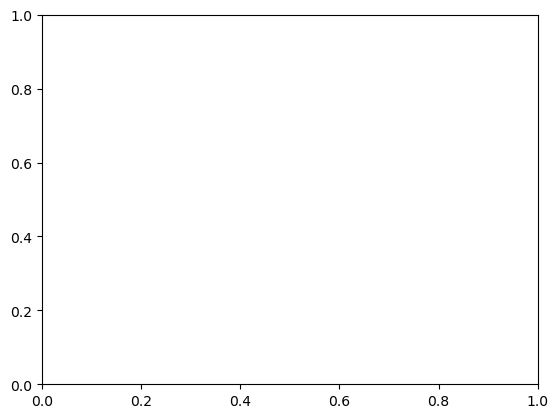

In [19]:
import geopandas as gpd
import matplotlib.pyplot as plt
polygons  = gpd.read_file(one_result[0][3])
if polygons.empty:
    print('there was no affected area detected')
else:
    polygons.plot()

In [23]:
polygons.empty

True

/home/roo/miniforge3/envs/climada_flood/lib/python3.9/pickle.py:1717: UserWarning: Unpickling a shapely <2.0 geometry object. Please save the pickle again; shapely 2.1 will not have this compatibility.
  setstate(state)


TypeError: Since CLIMADA 2.0, Exposures objects are not subscriptable. Data fields of Exposures objects are accessed using the `gdf` attribute. For example, `expo['value']` is replaced by `expo.gdf['value']`.